In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-completion/cc_institution_details.csv


# Exploratory Analysis with Linear Regressions #
Objective: Examine the relationship between median SAT score and the rate of Undergraduate Degree completion at universities across the United States 

### Load .csv into DataFrame ###

In [2]:
# Read csv
df = pd.read_csv('/kaggle/input/college-completion/cc_institution_details.csv',encoding = 'unicode_escape')

# Drop rows with NaN values in these two columns
# Reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna(subset=['med_sat_value','grad_100_value'],inplace=True)

df[['chronname','med_sat_value','grad_100_value']].head(5)


,chronname,med_sat_value,grad_100_value
0,Alabama A&M University,823.0,10.0
1,University of Alabama at Birmingham,1146.0,29.4
3,University of Alabama at Huntsville,1180.0,16.5
4,Alabama State University,830.0,8.8
5,University of Alabama at Tuscaloosa,1171.0,42.7


DataFrame description and info 

In [3]:
df.describe()

,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,...,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,1319.000000,1319.000000,1319.000000
mean,184418.935557,-88.168245,38.586454,5757.220622,21.545034,21.987870,22.102578,84341.309325,85324.068992,87348.403336,...,6.386066,12.124590,8.665574,59.430738,9.666803,2.925820,5.896721,35.221380,240.652767,943.435936
std,46843.123050,14.488400,4.628041,7398.954194,4.780312,2.203853,0.842575,56616.230265,28515.307598,18610.438411,...,3.547081,6.197375,3.921152,15.477191,4.623843,2.061909,2.980262,27.478083,121.098102,1180.799807
min,100654.000000,-158.062444,19.701854,99.000000,3.300000,12.100000,16.500000,0.000000,24502.000000,34510.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,4.000000,1.000000
25%,153117.000000,-93.985211,35.245352,1362.000000,18.900000,20.900000,21.500000,52789.500000,65365.000000,66436.000000,...,4.700000,8.275000,6.200000,52.950000,7.375000,1.500000,4.200000,14.000000,106.000000,244.500000
50%,186201.000000,-84.554583,39.730827,2618.000000,21.300000,22.200000,22.500000,70285.000000,79310.000000,101725.000000,...,6.400000,11.600000,8.150000,60.400000,9.650000,2.700000,5.550000,31.000000,252.000000,488.000000
75%,214805.500000,-77.473322,41.746897,6649.500000,23.800000,23.300000,22.500000,98288.000000,106812.000000,101725.000000,...,7.725000,14.825000,10.725000,69.225000,11.900000,3.800000,7.200000,44.000000,343.000000,1132.000000
max,462354.000000,-67.456534,61.191235,51333.000000,54.700000,50.900000,25.900000,598908.000000,188870.000000,101725.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,386.000000,8025.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 0 to 3794
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                1319 non-null   int64  
 1   chronname                             1319 non-null   object 
 2   city                                  1319 non-null   object 
 3   state                                 1319 non-null   object 
 4   level                                 1319 non-null   object 
 5   control                               1319 non-null   object 
 6   basic                                 1319 non-null   object 
 7   hbcu                                  56 non-null     object 
 8   flagship                              47 non-null     object 
 9   long_x                                1319 non-null   float64
 10  lat_y                                 1319 non-null   float64
 11  site             

### Identify independent variable ###

In [5]:
X = df['med_sat_value'].values.reshape(-1,1)
X

array([[ 823.],
       [1146.],
       [1180.],
       ...,
       [1070.],
       [1160.],
       [1069.]])

### Identify dependent variable ###

In [6]:
Y = df['grad_100_value'].values.reshape(-1,1)
Y

array([[10. ],
       [29.4],
       [16.5],
       ...,
       [ 0. ],
       [56.8],
       [51.5]])

### Split Data into Training/Testing & Plot points ###

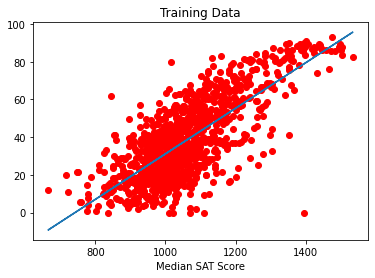

In [7]:
# Split the data into training and testing portions
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=.8, test_size=.2, random_state=100)

# Plot the best fit line and scatter-plot of data
m, b = np.polyfit(df['med_sat_value'], df['grad_100_value'], 1)
plt.plot(X, m*X + b)
plt.scatter(x_train, y_train, color='red')

# Assign labels 
plt.xlabel('Median SAT Score')
plt.ylabel=('Graduation Rate')
plt.title('Training Data')

plt.show()

### Fit Linear Model and Make Predictions ###

In [8]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)


training_acc = round(lm.score(x_train, y_train)*100, 2)
testing_acc = round(lm.score(x_test, y_test)* 100, 2)
print(f'Training Accuracy {training_acc}%')
print(f'Test Accuracy {testing_acc}%')

Training Accuracy 56.36%
Test Accuracy 56.97%


### Conclusions ###
* Since the accuracy of the model prediction is < 60%, we can make the assumption that there is not a strong relationship between Median SAT Score and Graduation Rate
* From the scatter plot we can see that the residuals trend closer to the best-fit line as the median SAT score increases
* There are several outliers in the data, with relatively high graduation rates at low median SAT scores and vice versa